In [89]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller




from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.arima.model import ARIMA
from sklearn.preprocessing import MinMaxScaler 

In [79]:
df = pd.read_csv('wind_speed.csv')
wind_df = df[['datetime', 'Chicago']]
wind_df = wind_df.fillna(0)
wind_df.index = wind_df.datetime
wind_df.drop('datetime', axis=1, inplace=True, errors='ignore')

df = wind_df
df = df[0::24]
df.index = pd.date_range(start='1/10/2012', end='3/9/2017', freq='d')
df

,Chicago
2012-01-10,0.0
2012-01-11,0.0
2012-01-12,2.0
2012-01-13,2.0
2012-01-14,4.0
...,...
2017-03-05,4.0
2017-03-06,3.0
2017-03-07,1.0
2017-03-08,6.0


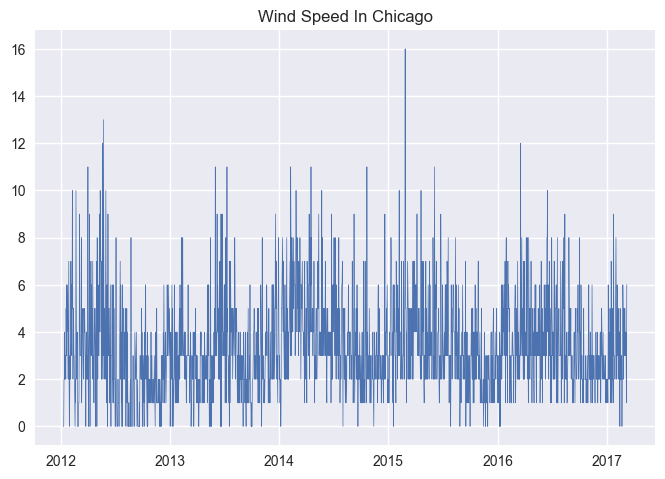

In [85]:
plt.figure(dpi=100)
plt.plot(df, lw=0.5)
plt.title('Wind Speed In Chicago')
plt.show()

Text(0.5, 1.0, 'AFC (Auto Correlation Plot)')

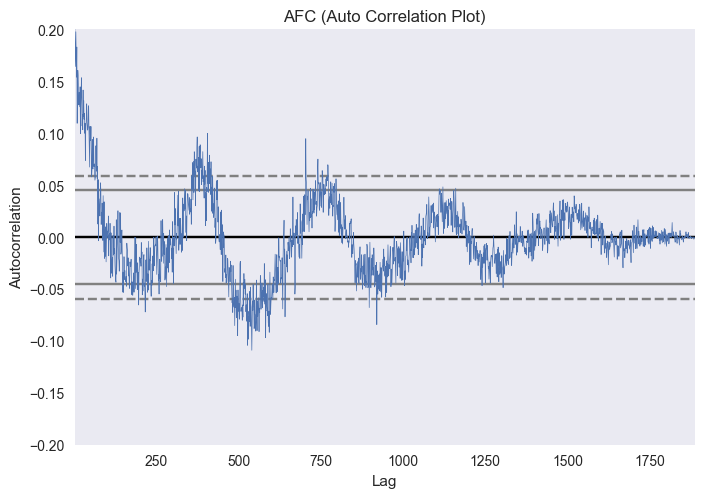

In [86]:
from pandas.plotting import autocorrelation_plot
plt.figure(dpi=100)
autocorrelation_plot(df['Chicago'], lw=0.5).set_ylim(-0.2, 0.2)
plt.title('AFC (Auto Correlation Plot)')

In [88]:
result = adfuller(df['Chicago'].values, autolag='AIC')

print(f'ADF Statistic: {result[0]}')
print(f'n_lags: {result[1]}')
print(f'p-value: {result[1]}')
for key, value in result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')    

ADF Statistic: -7.409690210048596
n_lags: 7.188536079477534e-11
p-value: 7.188536079477534e-11
Critial Values:
   1%, -3.433844279577887
Critial Values:
   5%, -2.8630835276091933
Critial Values:
   10%, -2.567591717680237


In [143]:

X = df.Chicago.values
scaler = MinMaxScaler()
X = scaler.fit_transform(X.reshape(len(X), 1))
X = X.reshape(X.shape[0])
train = X[1:len(X)-365]
test = X[len(X)-365:]

<Figure size 800x550 with 0 Axes>

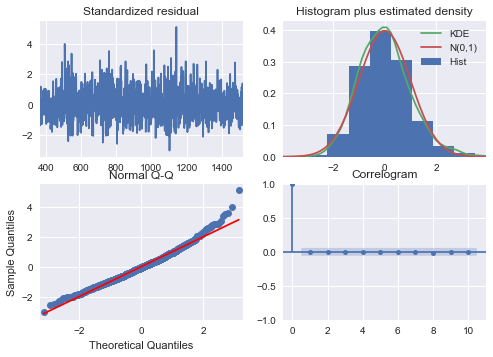

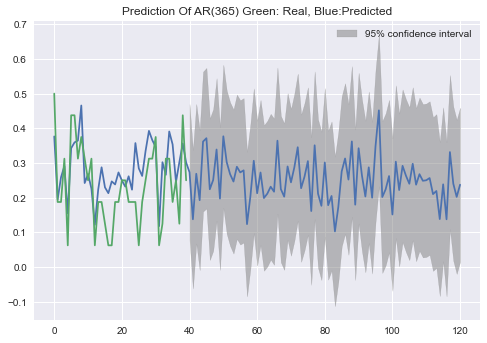

In [164]:
plt.figure(dpi=100)

model = AutoReg(train, lags=365)
model_fit = model.fit()
model_fit.plot_diagnostics()
plt.show()
model_fit.plot_predict(1480, 1600, dynamic=True)
plt.plot(train[1480:1520])
plt.title('Prediction Of AR(365) Green: Real, Blue:Predicted')
plt.show()

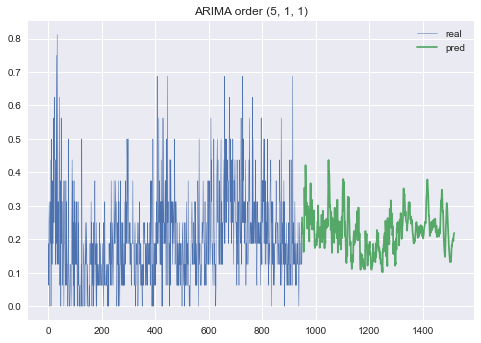

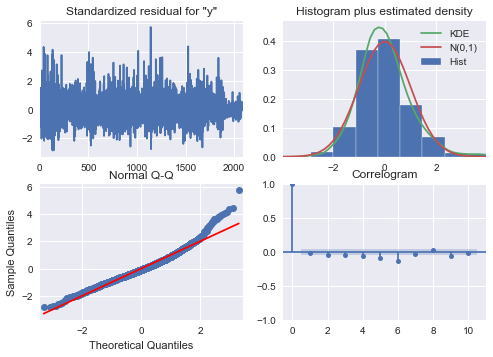

In [163]:


# ARIMA
predictions = [None for i in range(len(train) - len(test))]
history = [x for x in train]
test = [x for x in test]
for t in range(len(test) - 1):
	model = ARIMA(history, order=(5, 1, 0))
	model_fit = model.fit()
	pred = model_fit.forecast()
	predictions.append(pred[0]); history.append(test[t])


plt.plot(train[100:1050], lw=0.5, label='real')
plt.plot(predictions, label='pred')
plt.legend()
plt.title('ARIMA order (5, 1, 1)')
plt.show()

model_fit.plot_diagnostics()
plt.show()


